# Analysis
In this notebook that analysis is done. 

Things that are done in this section:
- Implement functions that exctract information from the .dat files
   - The header
   - The contribution summary
   - The contribution per generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from analysis import *
from simulation import *
import math

In [2]:
#testFile = "TestSimulation.dat"
testFile = "figure2_inv_100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"

Detail TestSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.8
    alphaRich = 0.8
    wealthPoor = 1
    wealthRich = 1
    typeOfRiskCurve = RiskCurve.Linear

    heterogeneous = False

Detail TestHeteroSimulation:

    generations = 10000
    numberOfGames = 1000
    numberOfRounds = 4
    groupSize = 2
    popSize = 100

    alphaPoor = 0.8
    alphaRich = 0.5
    wealthPoor = 1
    wealthRich = 4
    typeOfRiskCurve = RiskCurve.Linear

    heterogeneous = True
    

## Reading the file

### ReadingHeader

In [3]:
header = readHeader(filename = testFile)
header

{'nr_generations': 100000.0,
 'number_of_rounds': 4.0,
 'group_size': 2.0,
 'population_size': 100.0,
 'risk_in_round': 'EveryRound',
 'alpha_poor': 1.0,
 'alpha_rich': 1.0,
 'number_of_games': 1000.0,
 'wealth_poor': 1.0,
 'wealth_rich': 1.0,
 'type_of_risk_curve': 'PowerFunction',
 'heterogenous': 0.0,
 'lambda_value': 10.0}

### Reading the contribution 

In [4]:
ContributionArray = readContributionFileToData(fileName = testFile, heterogeneous = header["heterogenous"], investment = True, rounds = int(header["number_of_rounds"]))
# ContributionArray.shape

/Users/bogdanvlad/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/bogdanvlad/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


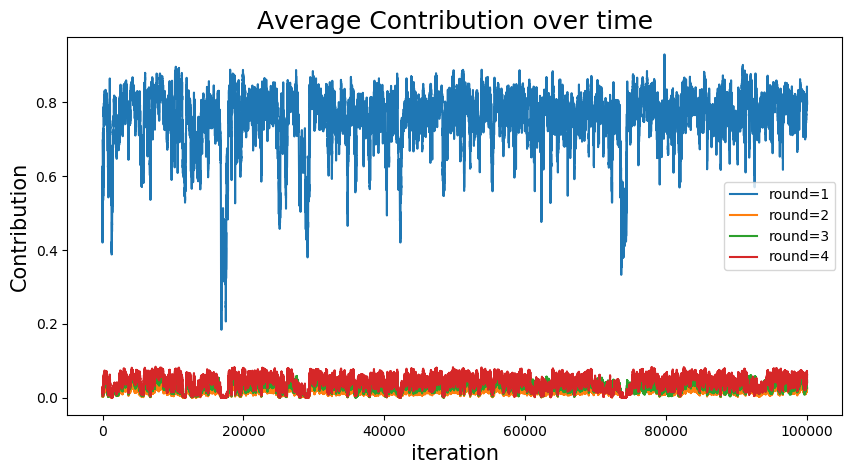

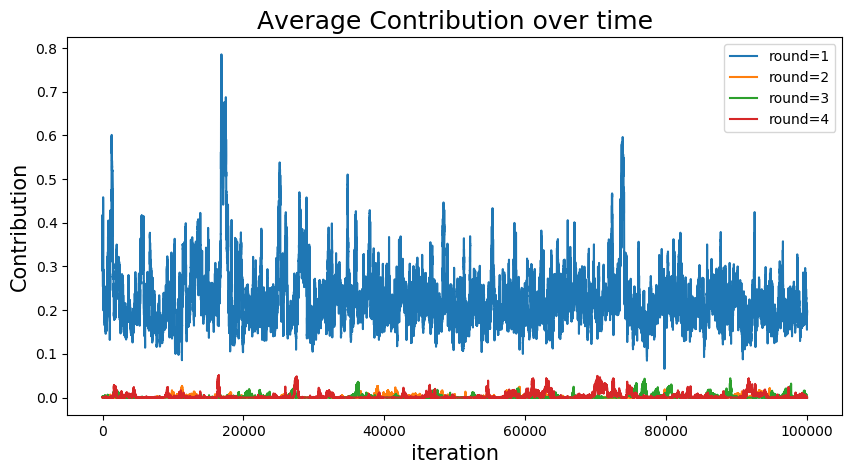

In [5]:
fig = plotContributionVsGeneration(ContributionArray[0])
fig = plotContributionVsGeneration(ContributionArray[1])

### Reading summary

In [6]:
summary = readSummary(filename=testFile,heterogeneous=header["heterogenous"])
summary

{'AverageContribution': 0.852742,
 'AverageContributionPerRoundRich': array([0.760372, 0.017731, 0.031413, 0.043   ])}

-------
Things to further do:
- Combine the information of multiple simulations in one plot

- Make plots of the paper.

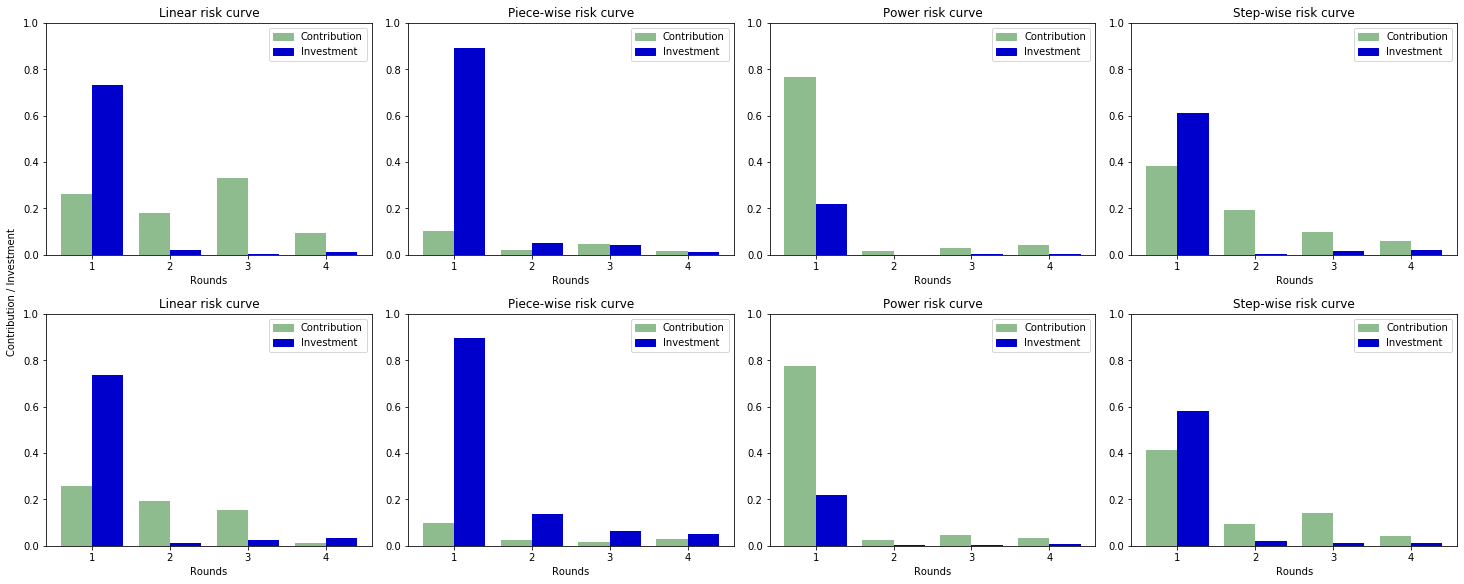

In [7]:
# reference: https://stackoverflow.com/questions/48157735/plot-multiple-bars-for-categorical-data
def subcategorybar(axis, X, vals, colors, title, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        axis.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge", color=colors[i])   
    axis.set_xticks([0, 1, 2, 3])
    axis.set_xticklabels([1, 2, 3, 4])
    axis.set_xlabel('Rounds')
    axis.set_title(title)
    axis.axis(ymin=0, ymax=1)

file1 = "figure2_inv_100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"
file2 = "figure2_inv_100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"
file3 = "figure2_inv_100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"
file4 = "figure2_inv_100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"

file5 = "figure2_inv2__100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_1.00.dat"
file6 = "figure2_inv2__100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_Linear_0_10.00.dat"
file7 = "figure2_inv2__100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_PowerFunction_0_10.00.dat"
file8 = "figure2_inv2__100000_4_2_100_EveryRound_1.00_1.00_1000_1_1_StepWiseLinear_0_7.00.dat"

contributionArray1 = readContributionFileToData(fileName = file1, heterogeneous = False, investment = True, rounds = 4)
contributionArray2 = readContributionFileToData(fileName = file2, heterogeneous = False, investment = True, rounds = 4)
contributionArray3 = readContributionFileToData(fileName = file3, heterogeneous = False, investment = True, rounds = 4)
contributionArray4 = readContributionFileToData(fileName = file4, heterogeneous = False, investment = True, rounds = 4)
contributionArray5 = readContributionFileToData(fileName = file5, heterogeneous = False, investment = True, rounds = 4)
contributionArray6 = readContributionFileToData(fileName = file6, heterogeneous = False, investment = True, rounds = 4)
contributionArray7 = readContributionFileToData(fileName = file7, heterogeneous = False, investment = True, rounds = 4)
contributionArray8 = readContributionFileToData(fileName = file8, heterogeneous = False, investment = True, rounds = 4)

contributions = [contributionArray1, contributionArray2, contributionArray3, contributionArray4,
                contributionArray5, contributionArray6, contributionArray7, contributionArray8]

fig = plt.figure(constrained_layout=True, figsize=(20,8))
fig.text(-0.009, 0.5, 'Contribution / Investment', va='center', rotation='vertical')

spec = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

colors = {'Contribution':'darkseagreen', 'Investment':'mediumblue'}         
labels = ["Contribution", "Investment"]
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

titles = ["Linear risk curve", "Piece-wise risk curve", "Power risk curve", "Step-wise risk curve"]

for i in range(0, 4):
    ax1 = fig.add_subplot(spec[0, i])
    ax1.legend(handles, labels)
    contributionArray1 = contributions[i]
    
    contribution1 = [np.mean(contributionArray1[0][20000:,0]),
         np.mean(contributionArray1[0][20000:,1]),
         np.mean(contributionArray1[0][20000:,2]),
         np.mean(contributionArray1[0][20000:,3])]

    investment1 = [np.mean(contributionArray1[1][20000:,0]),
         np.mean(contributionArray1[1][20000:,1]),
         np.mean(contributionArray1[1][20000:,2]),
         np.mean(contributionArray1[1][20000:,3])]

    subcategorybar(ax1, [1, 2, 3, 4], [contribution1, investment1], ["darkseagreen", "mediumblue"], titles[i])

for i in range(4, 8):
    ax1 = fig.add_subplot(spec[1, i-4])
    ax1.legend(handles, labels)
    contributionArray1 = contributions[i]
    
    contribution1 = [np.mean(contributionArray1[0][20000:,0]),
         np.mean(contributionArray1[0][20000:,1]),
         np.mean(contributionArray1[0][20000:,2]),
         np.mean(contributionArray1[0][20000:,3])]

    investment1 = [np.mean(contributionArray1[1][20000:,0]),
         np.mean(contributionArray1[1][20000:,1]),
         np.mean(contributionArray1[1][20000:,2]),
         np.mean(contributionArray1[1][20000:,3])]

    subcategorybar(ax1, [1, 2, 3, 4], [contribution1, investment1], ["darkseagreen", "mediumblue"], titles[i-4])

plt.savefig('figure6_.png')